In [41]:
import numpy as np 
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt

1. Generen al menos 30 combinaciones de pesos (que sumen 1).

2. Simulen entre 5,000 y 10,000 rendimientos para cada combinación.

3. Calculen para cada portafolio:

4. Rendimiento promedio.

5. Desviación estándar.

6. VaR 95%.

Impongan la restricción:

7. VaR 95% ≥ –5%.

8. Identifiquen el portafolio con mayor rendimiento esperado que cumpla la restricción.

Construyan:

9. Scatter plot riesgo (desviación o VaR) vs rendimiento esperado.

10. Histograma del portafolio elegido.

Respondan:

¿Cuántos portafolios cumplen la restricción?

¿Cuánto rendimiento se sacrifica por controlar riesgo?

In [3]:
tikers=["AAPL","MSFT","AMZN", "TSLA", "GOOGL","META" ]

In [12]:
prices=yf.download(tikers, start="2020-01-01", end="2026-02-24")["Close"]
prices


[*********************100%***********************]  6 of 6 completed


Ticker,AAPL,AMZN,GOOGL,META,MSFT,TSLA
Date,,,,,,
2020-01-02,72.400520,94.900497,67.920807,208.324799,152.158371,28.684000
2020-01-03,71.696625,93.748497,67.565491,207.222473,150.263779,29.534000
2020-01-06,72.267944,95.143997,69.366394,211.125229,150.652161,30.102667
2020-01-07,71.928062,95.343002,69.232399,211.582047,149.278580,31.270666
2020-01-08,73.085114,94.598503,69.725174,213.727051,151.656326,32.809334
...,...,...,...,...,...,...
2026-02-17,263.880005,201.149994,302.019989,639.289978,395.956238,410.630005
2026-02-18,264.350006,204.789993,303.329987,643.219971,398.690002,411.320007
2026-02-19,260.579987,204.860001,302.850006,644.780029,398.459991,411.709991


In [40]:
# Número de activos (columnas de tu DataFrame prices)
n_activos = prices.shape[1]

# Número de combinaciones
n_portafolios = 30

# Generar pesos (cada fila suma 1)
pesos = np.random.dirichlet(np.ones(n_activos), size=n_portafolios)

# Pasarlo a DataFrame para verlo mejor
pesos_df = pd.DataFrame(pesos, columns=prices.columns)

print(pesos_df)

Ticker      AAPL      AMZN     GOOGL      META      MSFT      TSLA
0       0.514404  0.090391  0.062556  0.154004  0.070491  0.108154
1       0.169446  0.357216  0.050773  0.106053  0.276187  0.040324
2       0.111643  0.022376  0.008941  0.246745  0.477096  0.133198
3       0.038578  0.060533  0.239822  0.397923  0.181097  0.082047
4       0.055498  0.091990  0.302678  0.252662  0.054408  0.242764
5       0.647199  0.059949  0.059774  0.002998  0.097417  0.132662
6       0.309175  0.160974  0.090333  0.034862  0.001952  0.402704
7       0.150962  0.165424  0.121375  0.002688  0.206176  0.353377
8       0.329237  0.147167  0.293321  0.110369  0.042014  0.077892
9       0.067676  0.104147  0.129684  0.092200  0.456144  0.150149
10      0.002777  0.643914  0.208849  0.010663  0.100576  0.033220
11      0.148466  0.213549  0.099087  0.150913  0.099463  0.288521
12      0.364211  0.327422  0.014176  0.043550  0.051649  0.198991
13      0.203078  0.057367  0.221364  0.280679  0.042111  0.19

In [17]:
# calcular las 5000 simulaciones 

# rendimeintos 
retornos = prices.pct_change().dropna()
retornos

Ticker,AAPL,AMZN,GOOGL,META,MSFT,TSLA
Date,,,,,,
2020-01-03,-0.009722,-0.012139,-0.005231,-0.005291,-0.012451,0.029633
2020-01-06,0.007969,0.014886,0.026654,0.018834,0.002585,0.019255
2020-01-07,-0.004703,0.002092,-0.001932,0.002164,-0.009118,0.038801
2020-01-08,0.016086,-0.007809,0.007118,0.010138,0.015928,0.049205
2020-01-09,0.021241,0.004799,0.010498,0.014311,0.012493,-0.021945
...,...,...,...,...,...,...
2026-02-17,0.031668,0.011872,-0.012103,-0.000750,-0.011113,-0.016314
2026-02-18,0.001781,0.018096,0.004337,0.006147,0.006904,0.001680
2026-02-19,-0.014261,0.000342,-0.001582,0.002425,-0.000577,0.000948


In [21]:
#mu calculo de rndimeintos promedio y covarianza 
mu = retornos.mean()
cov = retornos.cov()
mu, cov

(Ticker
 AAPL     0.001044
 AMZN     0.000752
 GOOGL    0.001195
 META     0.001109
 MSFT     0.000778
 TSLA     0.002571
 dtype: float64,
 Ticker      AAPL      AMZN     GOOGL      META      MSFT      TSLA
 Ticker                                                            
 AAPL    0.000399  0.000260  0.000251  0.000299  0.000258  0.000403
 AMZN    0.000260  0.000504  0.000287  0.000378  0.000276  0.000415
 GOOGL   0.000251  0.000287  0.000414  0.000340  0.000261  0.000354
 META    0.000299  0.000378  0.000340  0.000760  0.000310  0.000405
 MSFT    0.000258  0.000276  0.000261  0.000310  0.000352  0.000347
 TSLA    0.000403  0.000415  0.000354  0.000405  0.000347  0.001731)

In [23]:
# calculo de las 5000 simulacikones con montecarl 

n_sim = 5000

sim_retornos = np.random.multivariate_normal(mu, cov, n_sim)
sim_retornos

array([[-0.03704633, -0.03534   , -0.02000487, -0.02135969, -0.03057602,
        -0.08101298],
       [ 0.01237225,  0.0142154 ,  0.03034705,  0.03006384,  0.0396569 ,
         0.07119984],
       [ 0.00208557,  0.00643919,  0.00954447, -0.02692085, -0.01177237,
         0.02690516],
       ...,
       [-0.01079971, -0.04200555, -0.01282421, -0.04043518, -0.02706278,
        -0.04498012],
       [-0.01519094, -0.01878608, -0.03205282, -0.04161193, -0.0315064 ,
        -0.02976729],
       [-0.03172181, -0.00434318, -0.00841876, -0.01727558, -0.0294609 ,
        -0.04196527]], shape=(5000, 6))

In [27]:
# calculo de rendimeintos para cada   combinacion 
p=pesos.shape


# rendimiento del portafolio 
rend_port = np.dot(sim_retornos, pesos.T)

p, rend_port

((30, 6),
 array([[-0.03222371, -0.03677742, -0.02886846, ..., -0.02680755,
         -0.03491399, -0.0425455 ],
        [ 0.02354753,  0.02372553,  0.03101865, ...,  0.02812739,
          0.03564204,  0.02816334],
        [-0.00367802,  0.00241829, -0.0096367 , ..., -0.00302549,
          0.01060391,  0.00738613],
        ...,
        [-0.03004894, -0.0223621 , -0.02615713, ..., -0.02263492,
         -0.02259858, -0.03285603],
        [-0.02583008, -0.02237595, -0.0305    , ..., -0.03041876,
         -0.02940474, -0.02282493],
        [-0.01870382, -0.02441145, -0.02412037, ..., -0.01817345,
         -0.0171398 , -0.01962271]], shape=(5000, 30)))

In [35]:
rend_port = np.dot(sim_retornos, pesos.T)

# rendimeintos del portafolio  y lo convierto a un dataframepara mayor legibilidad  donde cada fila genera un pottafolio cin su respectiva simulacion
# por medio de las filas 

rend_port_df = pd.DataFrame(
    rend_port,
    columns=[f"Portafolio_{i+1}" for i in range(pesos.shape[0])]
)

rend_port_df

,Portafolio_1,Portafolio_2,Portafolio_3,Portafolio_4,Portafolio_5,Portafolio_6,Portafolio_7,Portafolio_8,Portafolio_9,Portafolio_10,...,Portafolio_21,Portafolio_22,Portafolio_23,Portafolio_24,Portafolio_25,Portafolio_26,Portafolio_27,Portafolio_28,Portafolio_29,Portafolio_30
0,-0.032224,-0.036777,-0.028868,-0.032399,-0.039209,-0.026849,-0.045847,-0.034522,-0.032540,-0.041751,...,-0.051377,-0.045896,-0.029712,-0.049023,-0.038705,-0.036331,-0.053651,-0.026808,-0.034914,-0.042546
1,0.023548,0.023726,0.031019,0.034276,0.034049,0.026233,0.038228,0.022057,0.034530,0.029546,...,0.039148,0.045768,0.034458,0.043695,0.030395,0.030354,0.049055,0.028127,0.035642,0.028163
2,-0.003678,0.002418,-0.009637,0.004078,-0.003184,-0.013774,0.009955,0.000214,0.002249,0.006729,...,0.010143,0.002142,-0.007311,0.006146,0.003776,0.004081,0.009703,-0.003025,0.010604,0.007386
3,-0.023292,-0.024941,-0.026888,-0.028161,-0.020623,-0.023278,-0.022028,-0.026889,-0.028710,-0.015910,...,-0.016994,-0.017077,-0.026732,-0.017727,-0.025906,-0.021966,-0.014994,-0.031489,-0.029785,-0.018005
4,0.000427,0.004602,0.003984,-0.014627,-0.005534,-0.005022,-0.010667,0.007733,-0.009100,-0.016637,...,-0.010949,-0.014276,-0.002011,-0.012303,-0.000102,-0.009860,-0.020601,-0.001530,-0.016052,-0.009954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.010642,-0.016423,-0.010953,-0.002374,-0.011782,0.000188,-0.016163,-0.015115,-0.006009,-0.011111,...,-0.020556,-0.016784,-0.008800,-0.018715,-0.014875,-0.011207,-0.018029,-0.004051,-0.004440,-0.014762
4996,-0.029517,-0.030214,-0.030533,-0.034094,-0.032768,-0.034280,-0.032344,-0.031667,-0.033452,-0.027118,...,-0.031083,-0.029475,-0.030966,-0.031248,-0.032754,-0.027708,-0.031900,-0.034207,-0.034055,-0.027943
4997,-0.030049,-0.022362,-0.026157,-0.027408,-0.032498,-0.038697,-0.025344,-0.020622,-0.024543,-0.038729,...,-0.029332,-0.034132,-0.027568,-0.030586,-0.021637,-0.030813,-0.034255,-0.022635,-0.022599,-0.032856
4998,-0.025830,-0.022376,-0.030500,-0.031276,-0.029438,-0.033634,-0.026031,-0.022966,-0.030609,-0.024642,...,-0.024481,-0.030444,-0.031966,-0.028020,-0.025336,-0.025998,-0.029269,-0.030419,-0.029405,-0.022825


In [36]:
rend_port_df.mean()
rend_port_df.std()

Portafolio_1     0.018489
Portafolio_2     0.018238
Portafolio_3     0.017975
Portafolio_4     0.019837
Portafolio_5     0.020579
Portafolio_6     0.022378
Portafolio_7     0.021662
Portafolio_8     0.018259
Portafolio_9     0.018927
Portafolio_10    0.021187
Portafolio_11    0.018206
Portafolio_12    0.024292
Portafolio_13    0.018871
Portafolio_14    0.024189
Portafolio_15    0.017955
Portafolio_16    0.022902
Portafolio_17    0.019815
Portafolio_18    0.019228
Portafolio_19    0.031411
Portafolio_20    0.021716
Portafolio_21    0.023272
Portafolio_22    0.021763
Portafolio_23    0.018224
Portafolio_24    0.022727
Portafolio_25    0.019242
Portafolio_26    0.018677
Portafolio_27    0.025410
Portafolio_28    0.018425
Portafolio_29    0.020114
Portafolio_30    0.020205
dtype: float64

In [39]:
baR_95 = rend_port_df.quantile(0.05)

restriccion = baR_95 >= -0.05
port_balidos = baR_95[restriccion].index



baR_95,restriccion,port_balidos
ret_esperado = rend_port_df.mean()
ret_balidos = ret_esperado[port_balidos]
mejor_port = ret_balidos.idxmax()
mejor_port


# es necesario dew acuerdo a nuestras restricciones elegir el mejor portafolio 

print("Mejor portafolio:", mejor_port)
print("Retorno esperado:", ret_esperado[mejor_port])
print("baR 95%:",baR_95[mejor_port])

Mejor portafolio: Portafolio_19
Retorno esperado: 0.0026491214281234724
baR 95%: -0.04872219959388944


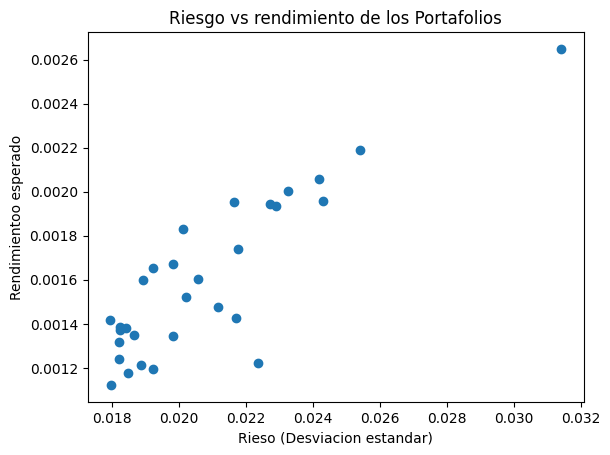

In [46]:
 #Scatter plot riesgo (desviación o VaR) vs rendimiento esperado.
riesgo = rend_port_df.std()

# Rendimiento esperado
ret = rend_port_df.mean()

plt.figure()
plt.scatter(riesgo, ret)

plt.xlabel("Rieso (Desviacion estandar)")
plt.ylabel("Rendimientoo esperado")
plt.title("Riesgo vs rendimiento de los Portafolios")

plt.show()

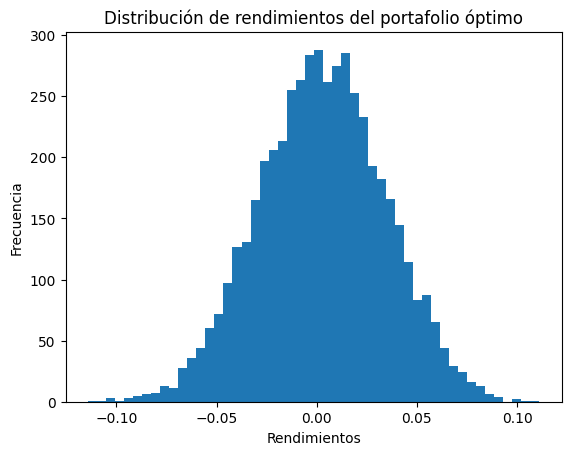

In [45]:
plt.figure()

plt.hist(rend_port_df[mejor_port], bins=50)

plt.xlabel("Rendimientos")
plt.ylabel("Frecuencia")
plt.title("Distribución de rendimientos del portafolio óptimo")

plt.show()

Cuántos portafolios cumplen la restricción? en mi caso colo la cumplio 1 que fue la combinacion del numero 19


¿Cuánto rendimiento se sacrifica por controlar riesgo? se sacrifica un rendimiento de  0.0026491214281234724